In [3]:
import pandas as pd

df=pd.read_csv('Downloads\loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [9]:
df.isnull().mean().sort_values()

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


### Compute the frequency with every feature

In [26]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

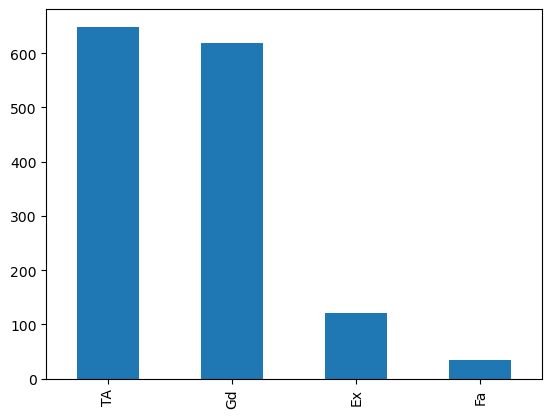

In [27]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

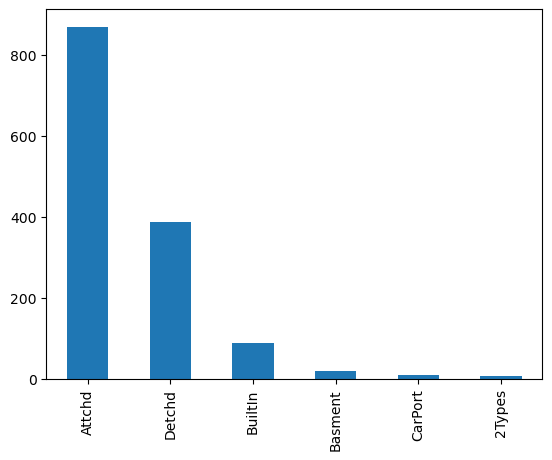

In [28]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

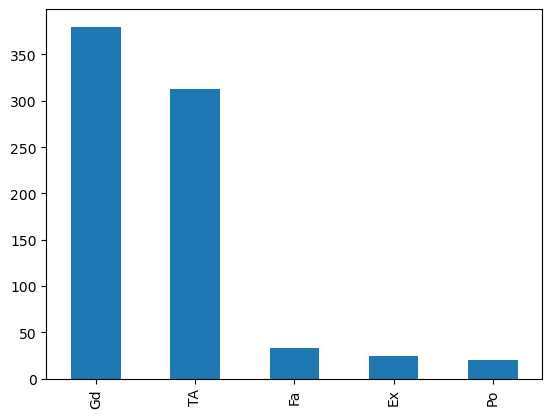

In [29]:
df['FireplaceQu'].value_counts().plot.bar()

In [34]:
df.GarageType.mode()[0]

'Attchd'

In [36]:
def impute_nan (df,variable):
    most_frequent = df[variable].mode()[0]
    df[variable].fillna(most_frequent , inplace = True)

In [38]:
for i in ['BsmtQual', 'GarageType','FireplaceQu']:
    impute_nan(df,i)

In [41]:
df.isnull().sum()     # Values has replaced from mode

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [47]:
df.FireplaceQu.value_counts()

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

<AxesSubplot:>

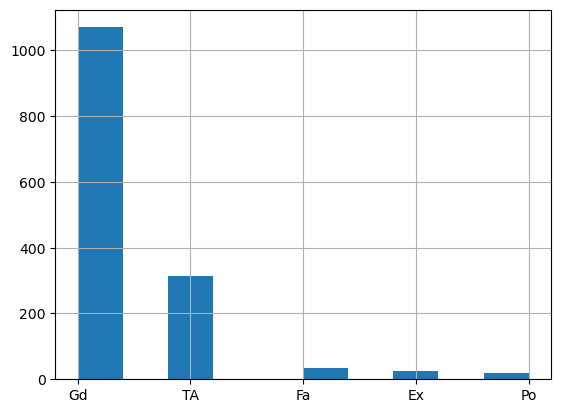

In [46]:
df.FireplaceQu.hist()      ## there were around 48% nan values.

#### Advantages
1. Easy To implement
2. Faster way to implement

#### Disadvantages

1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

## Adding a variable to capture NAN


In [49]:
df=pd.read_csv('Downloads\loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [51]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [52]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [54]:
frequent=df['BsmtQual'].mode()[0]

In [55]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [58]:
df.isnull().sum()

BsmtQual          0
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_Var      0
dtype: int64

In [59]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [61]:
df.isnull().sum()

BsmtQual            0
FireplaceQu         0
GarageType         81
SalePrice           0
BsmtQual_Var        0
FireplaceQu_Var     0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BsmtQual         1460 non-null   object
 1   FireplaceQu      1460 non-null   object
 2   GarageType       1379 non-null   object
 3   SalePrice        1460 non-null   int64 
 4   BsmtQual_Var     1460 non-null   int32 
 5   FireplaceQu_Var  1460 non-null   int32 
dtypes: int32(2), int64(1), object(3)
memory usage: 57.2+ KB


### Suppose if you have more frequent categories, we just replace NAN with a new category

In [63]:
df=pd.read_csv('Downloads\loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [64]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [66]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [67]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd
1458,TA,NaN,Attchd,142125,TA,Missing,Attchd


In [68]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [71]:
df

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd
